In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(0, 'USC00519397', '2010-01-01', 2.0, 18.3),
 (1, 'USC00519397', '2010-01-02', 0.0, 17.2),
 (2, 'USC00519397', '2010-01-03', 0.0, 23.3),
 (3, 'USC00519397', '2010-01-04', 0.0, 24.4),
 (4, 'USC00519397', '2010-01-06', None, 22.8)]

In [13]:
columns = inspector.get_columns('station')
for cl in columns:
    print(cl['name'], cl['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
engine.execute('SELECT * FROM station').fetchall()

[(0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 0.914),
 (1, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 4.45),
 (2, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 2.133),
 (3, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 3.627),
 (4, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 93.447),
 (5, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 5.943),
 (6, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84889, 10.027),
 (7, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.274),
 (8, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 46.449)]

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_data_point


('2017-08-23')

In [16]:
# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(year_ago)

2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores

year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago, Measurement.prcp != None).\
    order_by(Measurement.date).all()
print(year_prcp)

[('2016-08-23', 0.0), ('2016-08-23', 3.8), ('2016-08-23', 1.3), ('2016-08-23', 0.5), ('2016-08-23', 45.5), ('2016-08-23', 17.8), ('2016-08-24', 2.0), ('2016-08-24', 54.6), ('2016-08-24', 57.9), ('2016-08-24', 31.0), ('2016-08-24', 54.6), ('2016-08-24', 36.8), ('2016-08-25', 2.0), ('2016-08-25', 2.0), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 5.3), ('2016-08-25', 1.5), ('2016-08-25', 2.8), ('2016-08-26', 0.0), ('2016-08-26', 0.8), ('2016-08-26', 0.5), ('2016-08-26', 1.0), ('2016-08-26', 0.0), ('2016-08-26', 0.3), ('2016-08-27', 0.0), ('2016-08-27', 4.6), ('2016-08-27', 0.5), ('2016-08-27', 0.0), ('2016-08-27', 3.0), ('2016-08-28', 0.3), ('2016-08-28', 3.6), ('2016-08-28', 3.6), ('2016-08-28', 3.6), ('2016-08-28', 15.2), ('2016-08-28', 52.6), ('2016-08-29', 0.0), ('2016-08-29', 4.3), ('2016-08-29', 1.0), ('2016-08-29', 0.0), ('2016-08-29', 8.9), ('2016-08-29', 22.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.5), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df = pd.DataFrame(year_prcp, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.head()

,Precipitation
Date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,0.5
2016-08-23,45.5


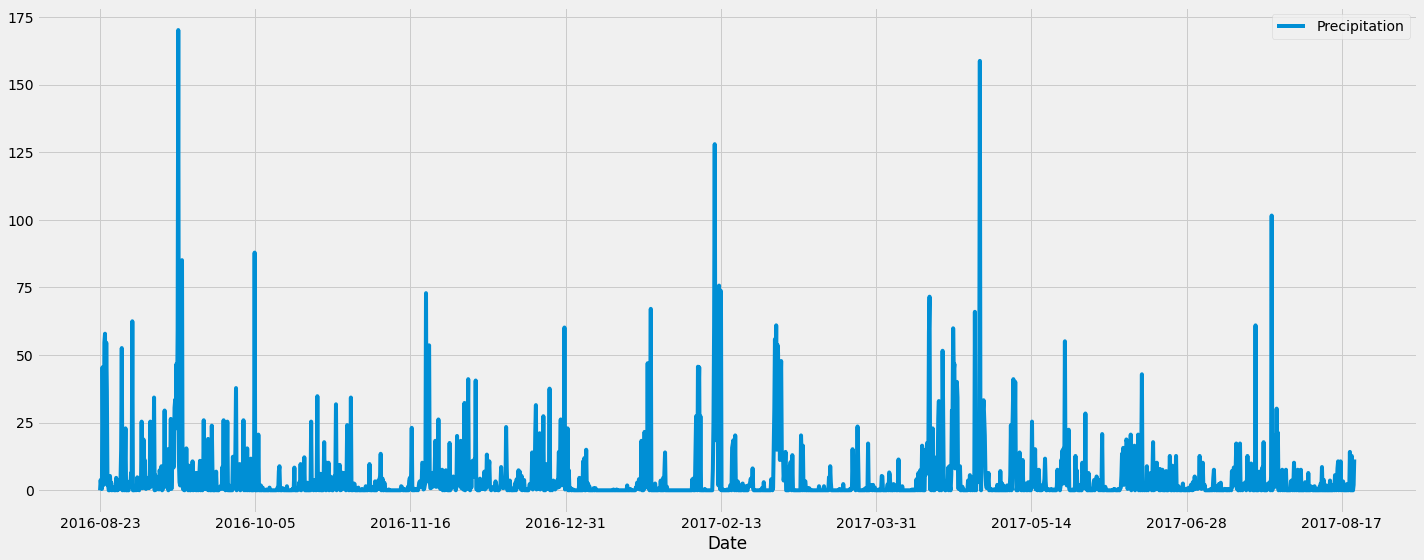

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(figsize=(20,8))
plt.tight_layout()
plt.savefig('Images/Precipitation.png')


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
station_m = session.query(func.count(Measurement.station)).all()
station_m

[(19550)]

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
max_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()

max_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                      func.avg(Measurement.tobs)).\
                      filter(Measurement.station == 'USC00519281' ).all()


print("The Minimum ,Maximum and Average Temp for the most active station is :" , temp_active_station)

The Minimum ,Maximum and Average Temp for the most active station is : [(12.2, 29.4, 22.03582251082252)]


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
resultss =  session.query(Measurement.tobs).\
                          filter(Measurement.station == 'USC00519281' ).\
                          filter(Measurement.date >= '2016,8,23').all()

resultss

[(23.3),
 (22.2),
 (20.0),
 (20.6),
 (21.1),
 (20.6),
 (24.4),
 (23.9),
 (23.3),
 (23.3),
 (22.8),
 (23.9),
 (23.3),
 (18.9),
 (21.7),
 (22.8),
 (23.9),
 (17.2),
 (16.1),
 (16.7),
 (18.3),
 (18.3),
 (23.9),
 (25.6),
 (20.6),
 (18.3),
 (20.6),
 (17.8),
 (20.0),
 (22.8),
 (23.3),
 (20.6),
 (20.0),
 (20.6),
 (18.3),
 (19.4),
 (20.6),
 (21.1),
 (13.3),
 (13.9),
 (14.4),
 (16.1),
 (21.7),
 (23.3),
 (21.7),
 (23.9),
 (22.2),
 (21.7),
 (22.2),
 (20.6),
 (21.7),
 (22.2),
 (15.6),
 (20.6),
 (19.4),
 (17.8),
 (20.6),
 (20.6),
 (21.7),
 (20.6),
 (22.2),
 (17.2),
 (17.2),
 (16.7),
 (21.1),
 (22.2),
 (19.4),
 (23.3),
 (18.9),
 (20.0),
 (20.0),
 (22.2),
 (22.2),
 (21.7),
 (21.1),
 (20.0),
 (20.0),
 (20.0),
 (20.0),
 (21.7),
 (18.9),
 (18.3),
 (17.2),
 (17.8),
 (22.2),
 (24.4),
 (24.4),
 (22.8),
 (22.2),
 (16.7),
 (18.3),
 (20.0),
 (23.3),
 (23.3),
 (23.3),
 (18.3),
 (20.6),
 (18.3),
 (20.0),
 (23.3),
 (21.1),
 (21.7),
 (23.3),
 (23.9),
 (22.8),
 (23.3),
 (24.4),
 (21.7),
 (20.0),
 (19.4),
 (22.2),
 

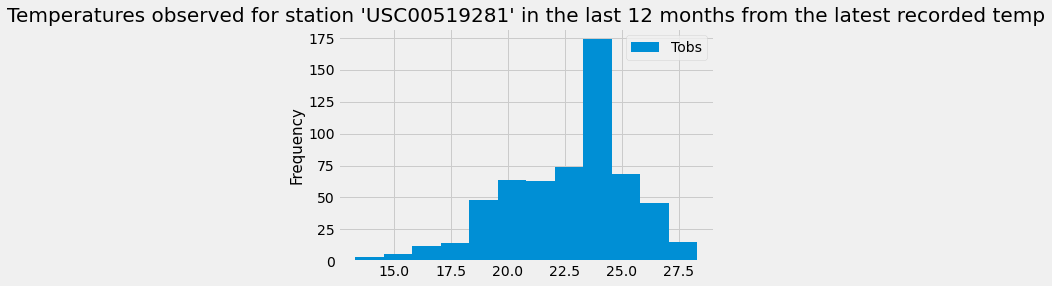

In [29]:
df3 = pd.DataFrame(resultss , columns = ['Tobs'])

df3.hist( bins = 12)

plt.ylabel("Frequency", fontsize = 15)
plt.title("Temperatures observed for station 'USC00519281' in the last 12 months from the latest recorded temp" ,
           size = 20)
labels = ["Tobs"]
plt.legend(labels)

plt.savefig('Images/Station_Analysis.png')
plt.show()


# Close session

In [26]:
# Close Session
session.close()